# Calibration measurment of S-adenosylmethionine (SAM) using UV-Vis spectroscopy

In the following example, we will use the defined data mode for a `Calibration` to make a structured data set, containing data and metadata of a photometric calibration experiment for S-Adenosyl methionine.  

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/S-adenosyl_methionine.png/2880px-S-adenosyl_methionine.png width="250">


The metadata includes:
- `name` of the analyte
- `inchi` code of the analyte
- `ph` of the measurement
- `temperature` of the measurement

The data comprises:
- known `concentration` of the analyte
- `conc_unit` of the concentration
- measured `signal` of the analyte

In the first step, the data is loaded from the file, which was generated by the photometer which was used to measure the signal of the samples.

## 1. Load the data

In [35]:
from sdRDM import DataModel
from pandas import read_csv

model = data_model = DataModel.from_markdown("calibration-data-model.md")

Simulated absorption data is in the file `data.csv`, which is loaded in the following cell.

In [36]:
data = read_csv("data.csv", header=0, index_col=0)
data

,Concentration µmol/l,Signal 260nm
0,0.0,0.003499
1,20.0,0.343499
2,40.0,0.683499
3,60.0,1.023499
4,80.0,1.363499
5,100.0,1.703499
6,120.0,2.043499
7,140.0,2.383499
8,160.0,2.723499
9,180.0,3.063499


## Create a `Calibration` object

In the following cell, all meta data is manually defined, while a `Calibration` object is created.

### Add metadata

In [37]:
sam_calibration = model.Calibration(
    analyte_name="S-Adenosyl methionine",
    date_measured="2024-02-25 19:25:40",
    inchi="InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)4-8-10(22)11(23)14(26-8)21-6-20-9-12(17)18-5-19-13(9)21/h5-8,10-11,14,22-23H,2-4,16H2,1H3,(H2-,17,18,19,24,25)/p+1/t7?,8-,10-,11-,14-,27?/m1/s1",
    ph=7.4,
    temperature=37,
    temperature_unit="C",
)

print(sam_calibration)

Calibration
├── id = 0a38a792-44d2-452a-a627-8eae432bf4ca
├── analyte_name = S-Adenosyl methionine
├── inchi = InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)4-8-10(22)11(23)14(26-8)21-6-20-9-12(17)18-5-19-13(9)21/h5-8,10-11,14,22-23H,2-4,16H2,1H3,(H2-,17,18,19,24,25)/p+1/t7?,8-,10-,11-,14-,27?/m1/s1
├── date_measured = 2024-02-25 19:25:40
├── temperature = 37.0
└── ph = 7.4



### Add Data

In [38]:
# Extract concentration unit from the column name
conc_unit = data.columns[0].split(" ")[1]

# Add the data of each row to individual `Samples`
for row in data.iterrows():
    concentration, signal = row[1].values
    sam_calibration.add_to_samples(
        init_conc=concentration,
        conc_unit=conc_unit,
        measured_signal=signal,
    )

print(sam_calibration)

Calibration
├── id = 0a38a792-44d2-452a-a627-8eae432bf4ca
├── analyte_name = S-Adenosyl methionine
├── inchi = InChI=1S/C15H22N6O5S/c1-27(3-2-7(16)15(24)25)4-8-10(22)11(23)14(26-8)21-6-20-9-12(17)18-5-19-13(9)21/h5-8,10-11,14,22-23H,2-4,16H2,1H3,(H2-,17,18,19,24,25)/p+1/t7?,8-,10-,11-,14-,27?/m1/s1
├── date_measured = 2024-02-25 19:25:40
├── temperature = 37.0
├── ph = 7.4
└── samples
    ├── 0
    │   └── Sample
    │       ├── id = 1adf5232-4f3a-45ac-a86d-ae0f04482188
    │       ├── init_conc = 0.0
    │       ├── conc_unit
    │       │   └── Unit
    │       │       ├── id = df6cb71a-ad4c-45d8-ad13-619dc7bc70b6
    │       │       ├── name = umol / l
    │       │       └── bases
    │       │           ├── 0
    │       │           │   └── BaseUnit
    │       │           │       ├── scale = 1e-06
    │       │           │       ├── kind = mol
    │       │           │       └── exponent = 1.0
    │       │           └── 1
    │       │               └── BaseUnit
    │       │   

## Visualize Data

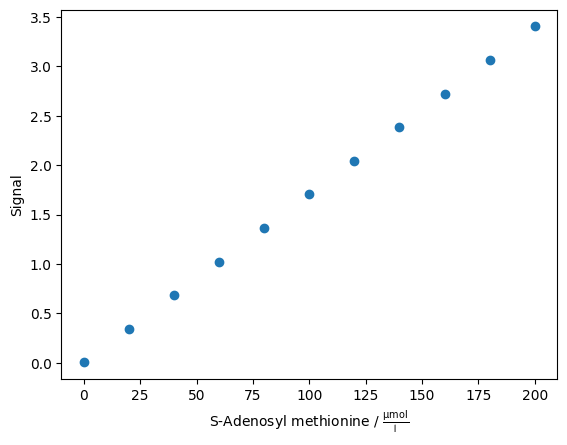

In [39]:
import matplotlib.pyplot as plt

# Extract data from the the `Calibration` object
concentrations = sam_calibration.get("samples/init_conc")
concentrations.insert(0, 0)  # insert data point due to a bug
unit = sam_calibration.get("samples/conc_unit")
signals = sam_calibration.get("samples/measured_signal")

plt.scatter(x=concentrations, y=signals)
plt.ylabel("Signal")
plt.xlabel(
    f"{sam_calibration.analyte_name} / {unit[0]._unit.to_string(format='latex')}")
plt.show()

## Safe Data

To safe the `Calibration` object to a file, the `to_file` method is used.

In [41]:
with open("sam_calibration.json", "w") as f:
    f.write(sam_calibration.json())